# 1.Data Loading

In [ ]:
!pip install squarify

In [ ]:
#!pip install factor_analyzer

In [ ]:
!pip install mplcyberpunk

In [ ]:
!pip install tueplots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
import matplotlib
import matplotlib.cm as cm
from datetime import datetime
import plotly.express as px
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib import ticker
from tqdm import tqdm
import mplcyberpunk
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from factor_analyzer import FactorAnalyzer

In [ ]:
 df=pd.read_csv('Billionaires Statistics Dataset.csv')

In [ ]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# 2.Data Preprocessing


In [ ]:
df.shape

(2640, 35)

In [ ]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [ ]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [ ]:
# Check for null values in each column
null_values = df.isnull().any()

# Count null values in each column
null_counts = df.isnull().sum()

null_percent = (round(null_counts/len(df),2)*100).astype(int)

# Create a new DataFrame
null_info_df = pd.DataFrame({
    'Has_Null': null_values,
    'Null_Count': null_counts,
    'Null_Percent': null_percent
})

# Display the result
print(null_info_df.sort_values(by='Null_Count', ascending=False))

                                            Has_Null  Null_Count  Null_Percent
organization                                    True        2315            88
title                                           True        2301            87
residenceStateRegion                            True        1893            72
state                                           True        1887            71
cpi_change_country                              True         184             7
cpi_country                                     True         184             7
tax_revenue_country_country                     True         183             7
total_tax_rate_country                          True         182             7
life_expectancy_country                         True         182             7
gross_tertiary_education_enrollment             True         182             7
gross_primary_education_enrollment_country      True         181             7
latitude_country                                True

In [ ]:
# Drop the columns with almost only have null values
df.drop(["organization", "title", "state", "residenceStateRegion"], axis=1, inplace=True)

In [ ]:
# Check for duplicates
df.duplicated().any()

False

In [ ]:
# Convert 'gdp_country' to float by removing '$' and ','
df['gdp_country'] = df['gdp_country'].str.replace('$','').replace(',','', regex=True).astype(float)
print(df['gdp_country'].dtype)

float64


<ipython-input-13-0cc4b4e5bb31>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['gdp_country'] = df['gdp_country'].str.replace('$','').replace(',','', regex=True).astype(float)


In [ ]:
# To see whether we can fill null values in country column usign latitude and logitude columns:
condition_country = (df['country'].isnull()) & (df['longitude_country'].notnull()) & (df['latitude_country'].notnull())

# Check if there are any rows that satisfy the conditions
condition_country.any()

False

In [ ]:
# Since country is an important feature for our analysis. We drop the rows with null country values
df.dropna(subset=['country'], inplace=True)

In [ ]:
# To see if we can fill out null values in age column using birthDate or birthYear columns
condition_age = ((df['age'].isnull()) & ((df['birthDate'].notnull()) | df['birthYear'].notnull()))

# Check if there are any rows that satisfy the conditions
condition_age.any()

False

In [ ]:
# Drop unnecessary columns
df.drop(["birthDay", "birthMonth", "birthYear"], axis=1, inplace=True)

In [ ]:
df['birthDate']

0         3/5/1949 0:00
1        6/28/1971 0:00
2        1/12/1964 0:00
3        8/17/1944 0:00
4        8/30/1930 0:00
             ...       
2635    12/14/1971 0:00
2636     3/10/1943 0:00
2637    12/18/1962 0:00
2638     8/21/1951 0:00
2639     11/1/1956 0:00
Name: birthDate, Length: 2602, dtype: object

In [ ]:
# Convert 'birthDate' to datetime
df['birthDate'] = df['birthDate'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M') if isinstance(x, str) else x)

In [ ]:
# Specify the columns with missing values and the country column
columns_to_fill = ['cpi_country','cpi_change_country',
                   'gdp_country', 'gross_tertiary_education_enrollment',
                   'gross_primary_education_enrollment_country',
                   'life_expectancy_country', 'tax_revenue_country_country',
                   'total_tax_rate_country', 'population_country',
                   'latitude_country', 'longitude_country']

# Identify unique countries with complete information
complete_countries = df.dropna(subset=columns_to_fill + ['country'])[['country'] + columns_to_fill].drop_duplicates()

# Group by 'country' and fill missing values with corresponding country's values
df[columns_to_fill] = df.groupby('country')[columns_to_fill].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Drop duplicate rows based on all columns
df = df.drop_duplicates()

# Reset index after dropping duplicates
df = df.reset_index(drop=True)

# Missing values after filling
df[columns_to_fill].isnull().sum()

cpi_country                                   146
cpi_change_country                            146
gdp_country                                   126
gross_tertiary_education_enrollment           144
gross_primary_education_enrollment_country    143
life_expectancy_country                       144
tax_revenue_country_country                   145
total_tax_rate_country                        144
population_country                            126
latitude_country                              126
longitude_country                             126
dtype: int64

In [ ]:
# Drop the remaining null values
df.dropna(inplace=True)

In [ ]:
# Count the total number of rows with at least one missing value
total_missing_rows = (df.isnull().any(axis=1)).sum()

# Print the result
print(f'Total rows with missing values: {total_missing_rows}')

Total rows with missing values: 0


# 3.Data Description and Visualization

1. Total number of billionaires
2. the Average Age of Billionaires
3. the relationship between the Age Distribution of Billionaires Tell
4. gender and Self-Made/not distributions among Billionaires
5. Country distribution
6. Industry Distribution
7. Geographical Distribution
8. How Does Tertiary Education Enrollment Vary Across Countries where billionaires reside and how does it correlate with the number of billionaires?
9. the Billionaire Wealth Correlate and Tax Rates Correlation

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe(include=['int','float']).T.round(2)

,count,mean,std,min,25%,50%,75%,max
rank,2369.00,1275.33,743.48,1.00,636.00,1272.00,1905.00,2540.00
finalWorth,2369.00,4783.12,10287.71,1000.00,1500.00,2400.00,4300.00,211000.00
age,2369.00,65.06,13.10,18.00,56.00,65.00,75.00,101.00
cpi_country,2369.00,128.01,26.70,99.55,117.24,117.24,125.08,288.57
cpi_change_country,2369.00,4.42,3.51,-1.90,1.70,2.90,7.50,53.50
gdp_country,2369.00,11778849420675.05,9564926447411.31,13672802158.00,1736425629520.00,19910000000000.00,21427700000000.00,21427700000000.00
gross_tertiary_education_enrollment,2369.00,67.45,21.44,4.00,50.60,67.00,88.20,136.60
gross_primary_education_enrollment_country,2369.00,102.87,4.76,84.70,100.20,101.80,102.60,142.10
life_expectancy_country,2369.00,78.09,3.75,54.30,77.00,78.50,80.90,84.20
tax_revenue_country_country,2369.00,12.55,5.38,0.10,9.60,9.60,12.80,37.20


In [ ]:
total_billionaire = (df['personName'].count())
print(f'Total Number of Billionaires in the World in 2022: {total_billionaire}')

avg_age = round(df['age'].mean(),2)
print(f'The Average Age of Billionaires: {avg_age}')

Total Number of Billionaires in the World in 2022: 2369
The Average Age of Billionaires: 65.06


In [ ]:
# Calculate the percentage of males and females
gender_counts = (df['gender'].value_counts(normalize=True)*100).round(2)

# Display the result
print(f'Percentage % of Males and Females in the Dataset: \n{gender_counts}')

Percentage % of Males and Females in the Dataset: 
M   88.22
F   11.78
Name: gender, dtype: float64


In [ ]:
# Calculate the percentage of males and females
selfmade_ratio = (df['selfMade'].value_counts(normalize=True)*100).round(2)

# Display the result
print(f'Percentage % of Selfmade Billionaires: \n{selfmade_ratio}')

Percentage % of Selfmade Billionaires: 
True    70.33
False   29.67
Name: selfMade, dtype: float64


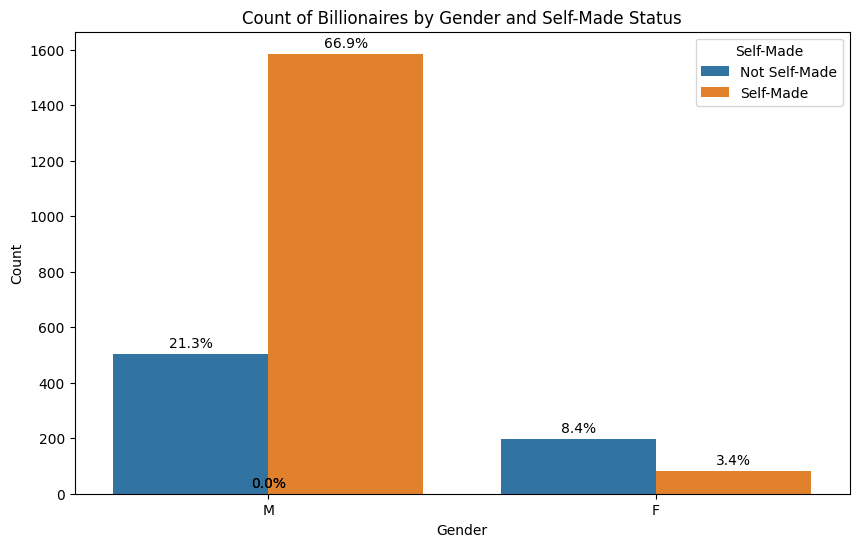

In [ ]:
# Create a bar graph
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='gender', hue='selfMade', data=df)

# Add title and labels
plt.title('Count of Billionaires by Gender and Self-Made Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the legend
plt.legend(title='Self-Made', labels=['Not Self-Made', 'Self-Made'])

# Add percentages above the bars
total_height = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format((p.get_height() / total_height) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01 * total_height  # Adjust the vertical position
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()

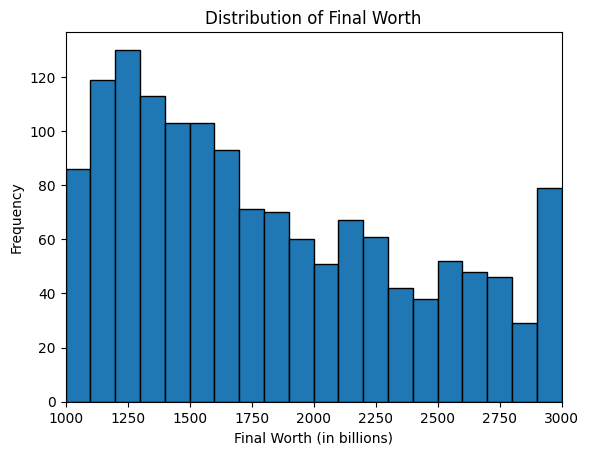

In [ ]:
# Histogram of 'finalWorth'
plt.hist(df['finalWorth'], bins=30, edgecolor='black', range=[0, 3000])
plt.title('Distribution of Final Worth')
plt.xlabel('Final Worth (in billions)')
plt.ylabel('Frequency')
plt.xlim([1000, 3000])  # Set the limits of the x-axis
plt.show()

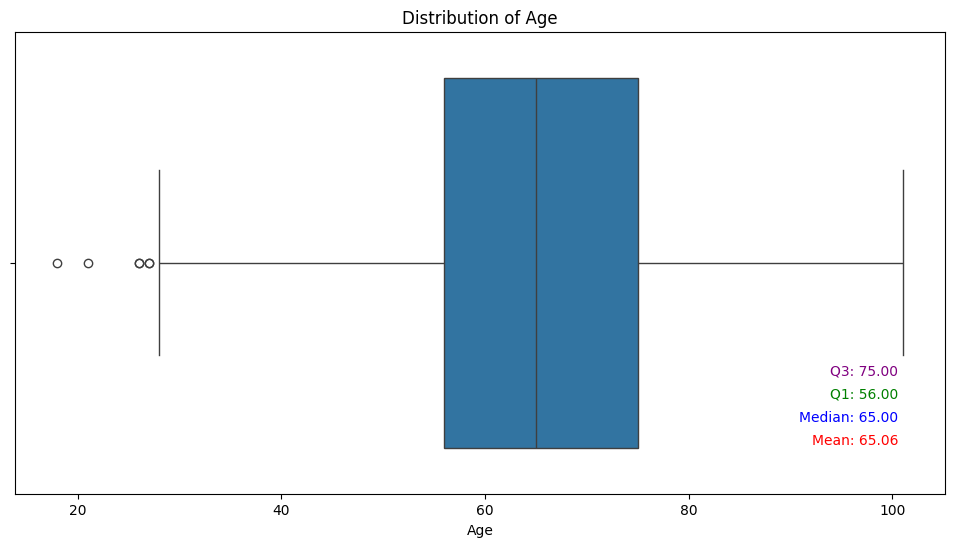

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot of 'age'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')

# Get the Axes object for the second plot
ax = plt.gca()

# Calculate and display mean, median, and quartiles for 'age'
mean_value_age = df['age'].mean()
median_value_age = df['age'].median()
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)

# Annotate the plot with 'bottom' vertical alignment
ax.text(0.95, 0.1, f'Mean: {mean_value_age:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)
ax.text(0.95, 0.15, f'Median: {median_value_age:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='blue', fontsize=10)
ax.text(0.95, 0.2, f'Q1: {q1_age:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=10)
ax.text(0.95, 0.25, f'Q3: {q3_age:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='purple', fontsize=10)

plt.show()

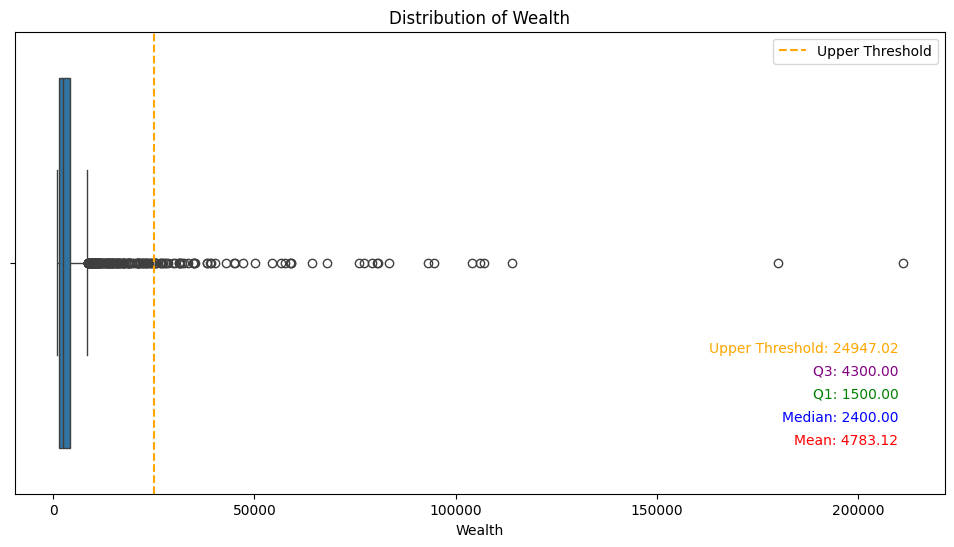

In [ ]:
# Boxplot of wealth
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['finalWorth'])
plt.title('Distribution of Wealth')
plt.xlabel('Wealth')

# Get the Axes object
ax = plt.gca()

# Calculate and display mean, median, and quartiles
mean_value = df['finalWorth'].mean()
median_value = df['finalWorth'].median()
q1 = df['finalWorth'].quantile(0.25)
q3 = df['finalWorth'].quantile(0.75)

# Annotate the plot with 'bottom' vertical alignment
ax.text(0.95, 0.1, f'Mean: {mean_value:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)
ax.text(0.95, 0.15, f'Median: {median_value:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='blue', fontsize=10)
ax.text(0.95, 0.2, f'Q1: {q1:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=10)
ax.text(0.95, 0.25, f'Q3: {q3:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='purple', fontsize=10)

# Calculate 1.5 standard deviations
std_dev = df['finalWorth'].std()
upper_threshold = mean_value + 1.96 * std_dev

# Draw lines for outliers
plt.axvline(upper_threshold, color='orange', linestyle='--', label='Upper Threshold')

# Annotate the plot with the upper and lower threshold values
ax.text(0.95, 0.3, f'Upper Threshold: {upper_threshold:.2f}', transform=ax.transAxes, verticalalignment='bottom', horizontalalignment='right', color='orange', fontsize=10)

plt.legend()

plt.show()

scatter plot

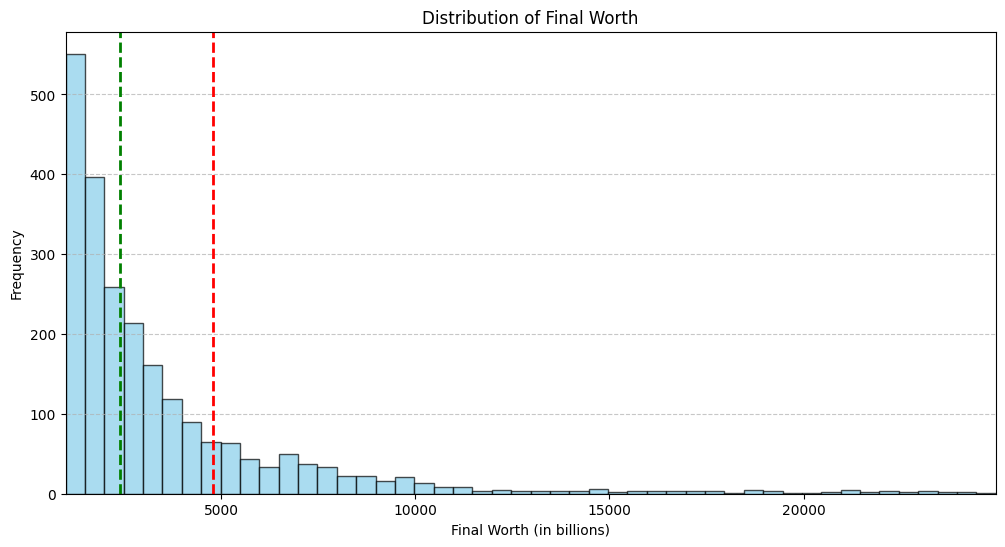

In [ ]:
# distribution of final worth
finalworth_avg = df["finalWorth"].mean()
finalworth_median = df["finalWorth"].median()

plt.figure(figsize=(12, 6))
plt.hist(df['finalWorth'], bins=50, edgecolor='black', color='skyblue', alpha=0.7, range=[0, upper_threshold])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(finalworth_avg, color='red', linestyle='--', linewidth=2, label='Average')
plt.axvline(finalworth_median, color='green', linestyle='--', linewidth=2, label='Median')
plt.title('Distribution of Final Worth')
plt.xlabel('Final Worth (in billions)')
plt.ylabel('Frequency')
plt.xlim([1000, upper_threshold])
plt.show()

We can see some obvious things. The distribution is right skewed, that means there are a few billionares with extremely high net worth, but majority have a relatively lower net worth.
The billionaires with extremely high net worth are outliers and they are stretching the x-axis of the histogram, making it difficult to observe the details of the main distribution.

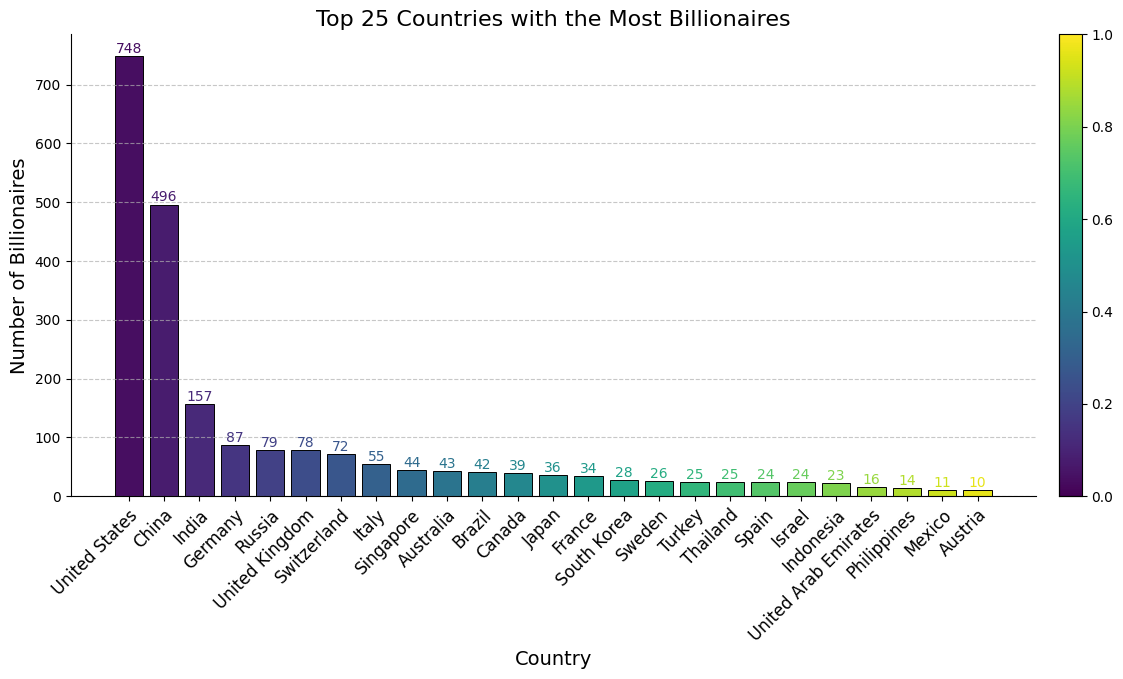

In [ ]:
# Let's look at the number of billionaires by country
from matplotlib.cm import ScalarMappable
plt.figure(figsize=(15, 6))

# Count the number of billionaires by country
country_counts = df['country'].value_counts()

# Select the top 25 countries
top_25_countries = country_counts.head(25)

# Use Seaborn color palette for the plot
colors = sns.color_palette("viridis", len(top_25_countries))

# Plot the bar chart for the top 25 countries
bars = plt.bar(top_25_countries.index, top_25_countries, color=colors, edgecolor='black', linewidth=0.7)

# Add labels and title
plt.title('Top 25 Countries with the Most Billionaires', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Billionaires', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=12)

# Create a legend with colors representing the numbers in the bars
sm = ScalarMappable(cmap='viridis')
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, ax=plt.gca())  # Use ax=plt.gca() to get the current axis

# Add data labels on top of each bar
for bar, color, value in zip(bars, colors, top_25_countries):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(value), ha='center', va='bottom', fontsize=10, color=color)

plt.grid(axis='y', linestyle='--', alpha=0.7)


# Remove top and right spines for aesthetics
sns.despine()

plt.show()

different scalin above 400

In [ ]:
# Count the number of billionaires and calculate total wealth per country
counts = df.groupby('country').agg({'finalWorth': ['sum', 'count']}).reset_index()
counts.columns = ['country', 'total_wealth', 'billionaire_count']

# Create a new column for formatted text
counts['text'] = counts.apply(lambda row: f'Total Wealth: {row["total_wealth"]:.2f}B\nNumber of Billionaires: {row["billionaire_count"]}', axis=1)

# Create the Choropleth map with custom styling
fig = px.choropleth(counts,
                    locations='country',
                    locationmode='country names',
                    color='billionaire_count',  # Use the number of billionaires for color
                    title='Number of Billionaires per Country',
                    hover_name='country',
                    custom_data=[counts['text']],  # Pass the formatted text as custom data
                    color_continuous_scale=px.colors.sequential.Greens,  # Improved color scale
                    labels={'billionaire_count': 'Number of Billionaires'},
                    template='plotly_dark',  # Dark template
                    projection='natural earth',  # Use a more appealing projection
                    )

# Update layout for better appearance
fig.update_layout(geo=dict(
                    showframe=False,
                    showcoastlines=False,
                    projection_scale=1,  # Adjust the scale for better visibility
                    ),
                  coloraxis_colorbar=dict(title='Number of Billionaires'),
                  height=800,  # Adjust the height
                  width=1500,    # Adjust the width
                  )

# Add custom hover template to display the formatted text
fig.update_traces(hovertemplate='<br>'.join([
    'Country: %{hovertext}',
    'Total Wealth: %{customdata[0]}'
]))

# Show the figure
fig.show()


<ipython-input-34-1b58d2f66e8d>:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



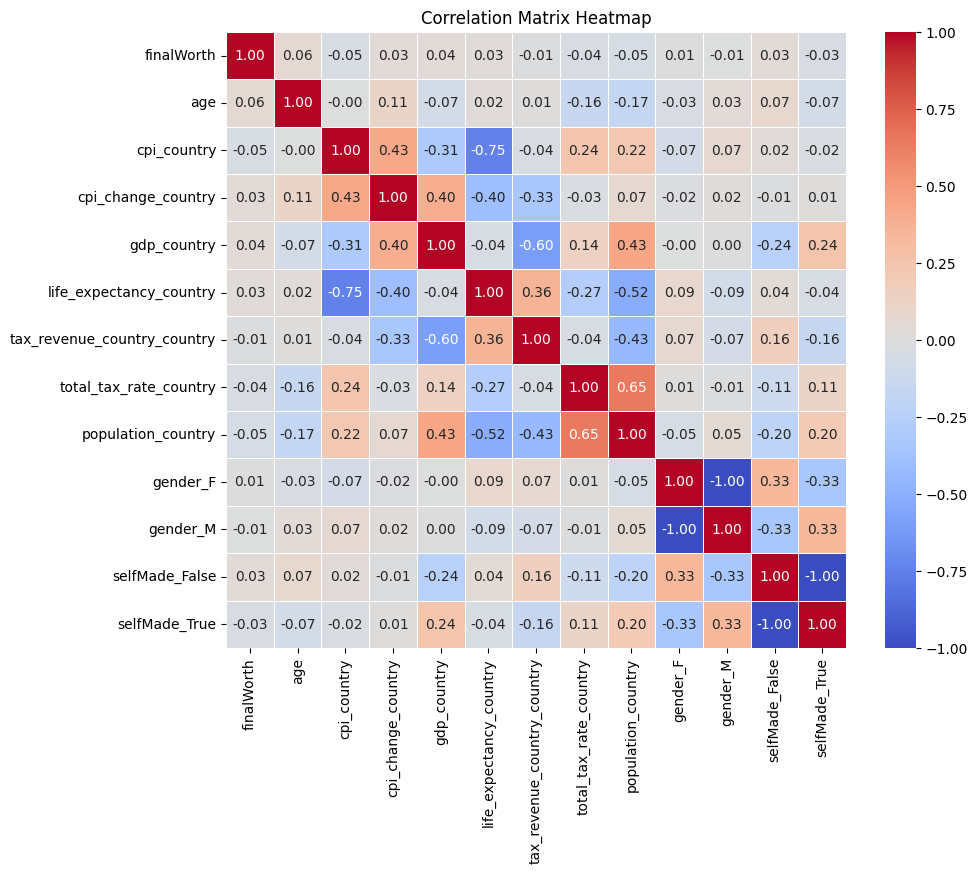

In [ ]:
selected_columns = ["finalWorth", 'age', 'country',
                    'source', 'industries', 'selfMade',
                    'gender', 'cpi_country', 'cpi_change_country', 'gdp_country',
                    'life_expectancy_country', 'tax_revenue_country_country',
                    'total_tax_rate_country','population_country']

df_selected = df[selected_columns]
df_encoded = pd.get_dummies(df_selected, columns=['gender', 'selfMade'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

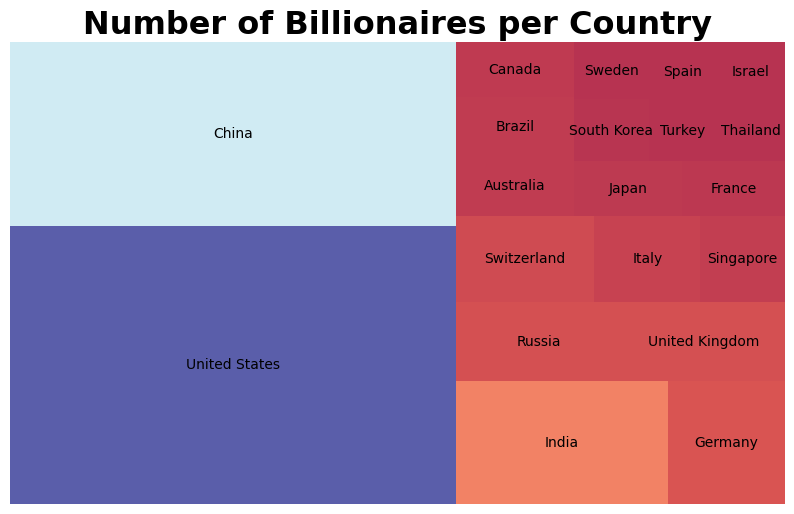

In [ ]:
plt.figure(figsize=(10,6))
# Count the number of billionaires per country
counts = df['country'].value_counts()
# Create a data frame with this
data = pd.DataFrame({'nb': counts})
data = data.sort_values(by='nb', ascending=False)
top20_counts = data.head(20)

# Create a color palette, stored as a variable named "colors"
cmap = plt.cm.RdYlBu
mini=min(top20_counts['nb'])
maxi=max(top20_counts['nb'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top20_counts['nb']]

# Create the plot with squarify
squarify.plot(sizes=top20_counts['nb'], label=top20_counts.index, alpha=.8, color=colors)
plt.title('Number of Billionaires per Country',fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

# Bootstrap Woman vs Man


In [ ]:
# selfmade 1
df_sm = df[df['selfMade'] == True][['selfMade','finalWorth']] # the selfmade billionaires
df_nsm = df[df['selfMade'] == False][['selfMade','finalWorth']] # inherited billionaires

n_sm = df_sm.shape[0] # number of selfmade billionaires
n_nsm = df_nsm.shape[0] # number of inherited billionaries

In [ ]:
# selfmade 2
NBOOT = 10000 # number of bootstrap replicates to build
N = 100

Simulation_sm = np.random.choice(df_sm["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples
Simulation_nsm = np.random.choice(df_nsm["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples

Richest_sm = np.max(Simulation_sm, axis = 1) # the wealthiest for each bootstrap sample
Richest_nsm = np.max(Simulation_nsm, axis = 1) # the wealthiest for each bootstrap sample

# compute the difference in wealth between the two groups
Diff = Richest_sm - Richest_nsm

Mean_women = np.mean(Simulation_sm, axis = 1)
Mean_men = np.mean(Simulation_nsm, axis=1)

Std_sm = np.std(Simulation_sm, axis = 1)
Std_nsm = np.std(Simulation_nsm, axis = 1)

In [ ]:
# gender 1
df_f = df[df['gender'] == "F"][['gender','finalWorth']] # the wealths of the women
df_m = df[df['gender'] == "M"][['gender','finalWorth']] # the wealths of the men

n_f = df_f.shape[0] # number of female billionaire
n_m = df_m.shape[0] # number of male billionaire

In [ ]:
# gender 2
NBOOT = 10000 # number of bootstrap replicates to build
N = 100 # np.min([n_f, n_m]) # let's fix the size of each group to be equal, to avoid problems with the varying number of billionaires

Simulation_women = np.random.choice(df_f["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples
Simulation_men = np.random.choice(df_m["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples

Richest_women = np.max(Simulation_women, axis = 1) # the wealthiest for each bootstrap sample
Richest_men = np.max(Simulation_men, axis = 1) # the wealthiest for each bootstrap sample

# compute the difference in wealth between the two groups
Diff = Richest_women - Richest_men

Mean_women = np.mean(Simulation_women, axis = 1)
Mean_men = np.mean(Simulation_men, axis=1)

Std_women = np.std(Simulation_women, axis = 1)
Std_men = np.std(Simulation_men, axis = 1)

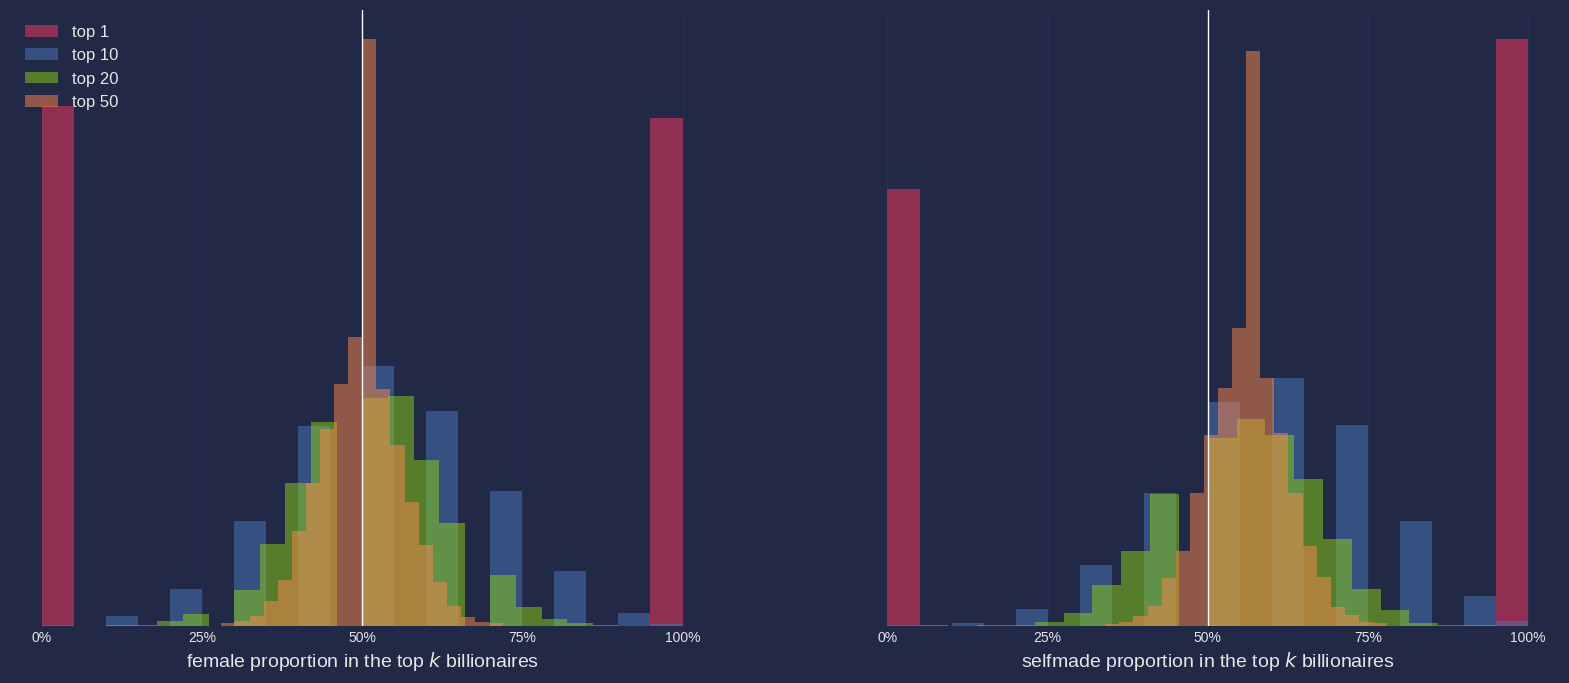

In [ ]:
average_of_difference = (Simulation_men - Simulation_women).mean(axis=1)
mins = Simulation_men.min(axis=1) - Simulation_women.min(axis=1)

# Concatenate the simulations and keep track of the gender
Simulation_all_gender = np.concatenate((Simulation_men, Simulation_women), axis=1)
gender = np.array([0] * Simulation_men.shape[1] + [1] * Simulation_women.shape[1])
# Concatenate the simulations and keep track of the selfmade
Simulation_all_sm = np.concatenate((Simulation_nsm, Simulation_sm), axis=1)
selfmade = np.array([0] * Simulation_nsm.shape[1] + [1] * Simulation_sm.shape[1])

# Get the indices that would sort the array
sorted_indices_gender = np.argsort(Simulation_all_gender, axis=1)
sorted_indices_sm = np.argsort(Simulation_all_sm, axis=1)

plt.style.use("cyberpunk")

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
ax = axs[0]


for k, c in zip(
    [1, 10, 20, 50], [rgb.tue_red, rgb.tue_blue, rgb.tue_green, rgb.tue_orange]
):
    # Check if the indices of the girls are in the top k
    top_k_girls = np.isin(
        sorted_indices_gender[:, :k],
        np.arange(Simulation_men.shape[1], Simulation_all_gender.shape[1]),
    )

    # Compute the percentage of the top k runners that are girls
    percentage_girls = top_k_girls.mean(axis=1) * 100

    ax.hist(
        percentage_girls,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.legend(loc="upper left", framealpha=1.0, facecolor="white", edgecolor="none", fontsize = "large")
ax.set_xlabel("female proportion in the top $k$ billionaires", fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.axvline(50, color = "white", alpha = 1.0, lw=1)

ax = axs[1]

for k, c in zip(
    [1, 10, 20, 50], [rgb.tue_red, rgb.tue_blue, rgb.tue_green, rgb.tue_orange]
):
    # Check if the indices of the girls are in the top k
    top_k_selfmade = np.isin(
        sorted_indices_sm[:, :k],
        np.arange(Simulation_nsm.shape[1], Simulation_all_sm.shape[1]),
    )

    # Compute the percentage of the top k runners that are girls
    percentage_selfmade = top_k_selfmade.mean(axis=1) * 100

    ax.hist(
        percentage_selfmade,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.set_xlabel("selfmade proportion in the top $k$ billionaires", fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.axvline(50, color = "white", alpha = 1.0, lw=1)

#fig.savefig("erbelauf_U10_bootstrap2.pdf")

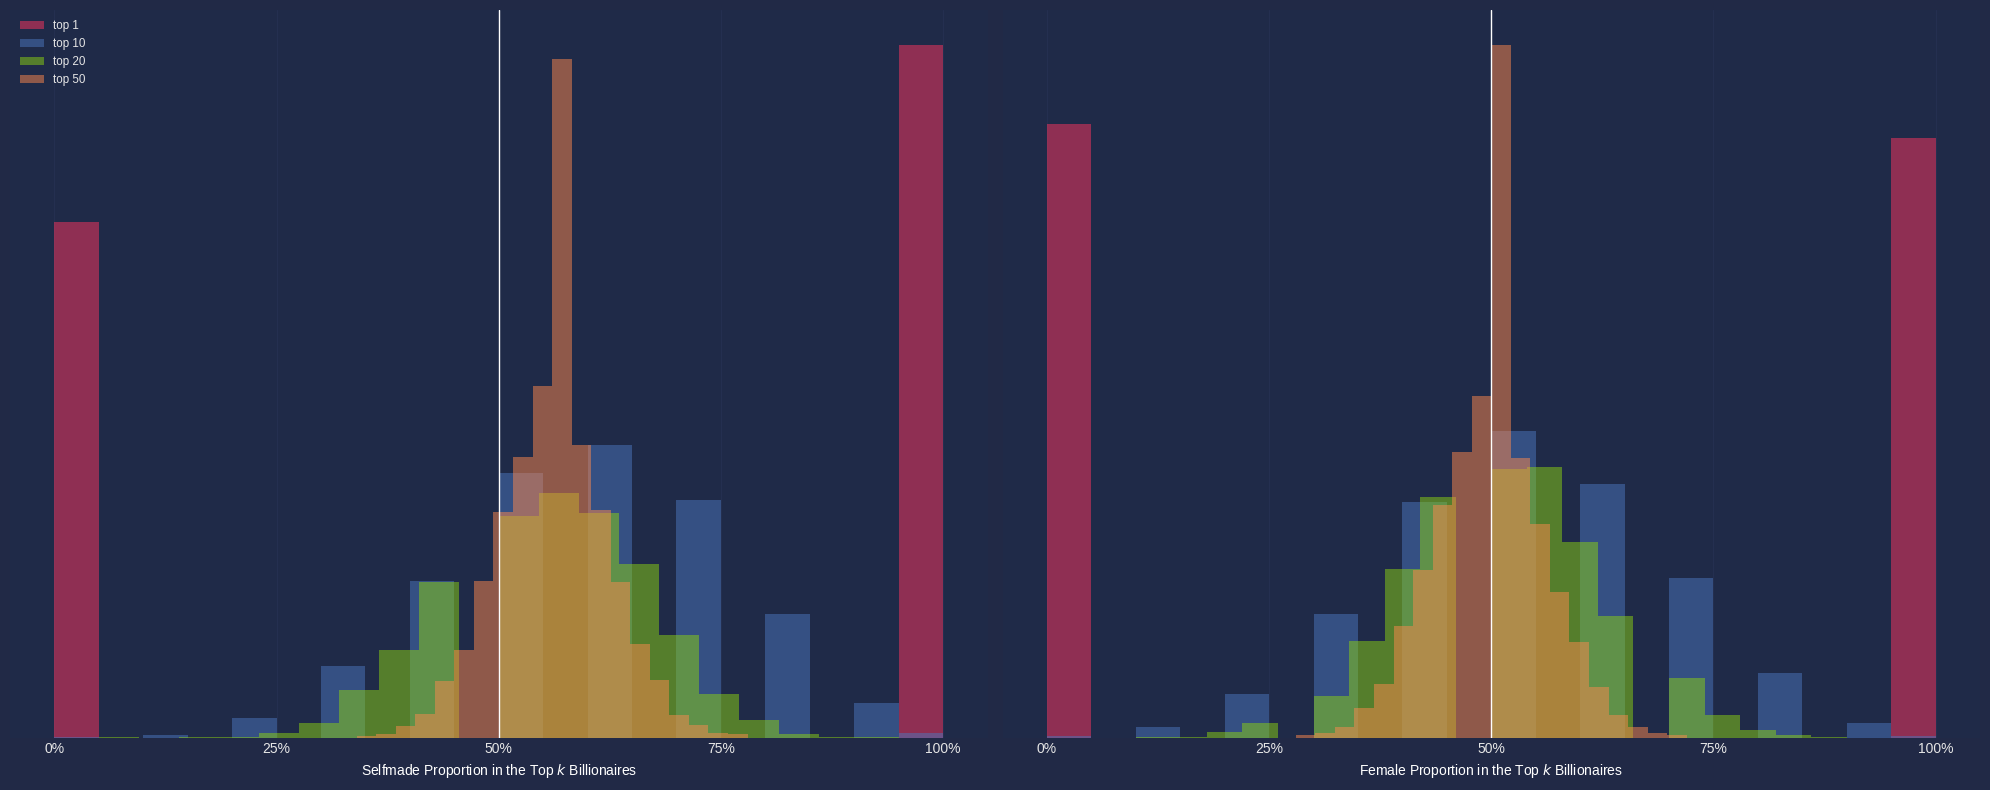

In [ ]:
class rgb:
    tue_red = '#FF355E'
    tue_blue = '#4B77BE'
    tue_green = '#8CD211'
    tue_orange = '#FF884D'
    tue_dark = '#1f2a48'

# Set Cyberpunk-style color palette
cp_palette = [rgb.tue_red, rgb.tue_blue, rgb.tue_green, rgb.tue_orange]

plt.rcParams['axes.facecolor'] = rgb.tue_dark
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot for selfmade proportion
ax = axs[0]
for k, c in zip([1, 10, 20, 50], cp_palette):
    top_k_selfmade = np.isin(
        sorted_indices_sm[:, :k],
        np.arange(Simulation_nsm.shape[1], Simulation_all_sm.shape[1]),
    )
    percentage_selfmade = top_k_selfmade.mean(axis=1) * 100
    ax.hist(
        percentage_selfmade,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.legend(loc="upper left", framealpha=1.0, facecolor="black", edgecolor="none", fontsize='small')
ax.set_xlabel("Selfmade Proportion in the Top $k$ Billionaires", color='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis='x', which='major', alpha=0.5)
ax.axvline(50, color="white", alpha=1.0, lw=1)

# Plot for female proportion
ax = axs[1]
for k, c in zip([1, 10, 20, 50], cp_palette):
    top_k_girls = np.isin(
        sorted_indices_gender[:, :k],
        np.arange(Simulation_men.shape[1], Simulation_all_gender.shape[1]),
    )
    percentage_girls = top_k_girls.mean(axis=1) * 100
    ax.hist(
        percentage_girls,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.set_xlabel("Female Proportion in the Top $k$ Billionaires", color='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis='x', which='major', alpha=0.5)
ax.axvline(50, color="white", alpha=1.0, lw=1)

plt.tight_layout()
plt.show()


In [ ]:
# find the number of selfmade woman-man
# inherited man-woman, numbers and the ratios
sm_w = df[(df['selfMade'] == True) & (df['gender'] == "F")][['gender','selfMade','finalWorth']] # the selfmade women
sm_m = df[(df['selfMade'] == True) & (df['gender'] == "M")][['gender','selfMade','finalWorth']] # the selfmade men
in_w = df[(df['selfMade'] == False) & (df['gender'] == "F")][['gender','selfMade','finalWorth']] # the inherited women
in_m = df[(df['selfMade'] == False) & (df['gender'] == "M")][['gender','selfMade','finalWorth']] # the inherited women

n_sm_w = sm_w.shape[0]
n_sm_m = sm_m.shape[0]
n_in_w = in_w.shape[0]
n_in_m = in_m.shape[0]

print(f"The number of selfmade woman:{n_sm_w}\n", f"The ratio of selfmade among woman billionaires: {round(n_sm_w/n_f*100,2)}%\n",
      f"The number of selfmade man:{n_sm_m}\n", f"The ratio of selfmade among man billionaires: {round(n_sm_m/n_m*100,2)}%\n",
      f"The number of inherited woman:{n_in_w}\n", f"The ratio of inherited among woman billionaires: {round(n_in_w/n_f*100,2)}%\n",
      f"The number of inherited man:{n_in_m}\n", f"The ratio of inherited among man billionaires: {round(n_in_m/n_m*100,2)}%\n"
      )

The number of selfmade woman:81
 The ratio of selfmade among woman billionaires: 29.03%
 The number of selfmade man:1585
 The ratio of selfmade among man billionaires: 75.84%
 The number of inherited woman:198
 The ratio of inherited among woman billionaires: 70.97%
 The number of inherited man:505
 The ratio of inherited among man billionaires: 24.16%



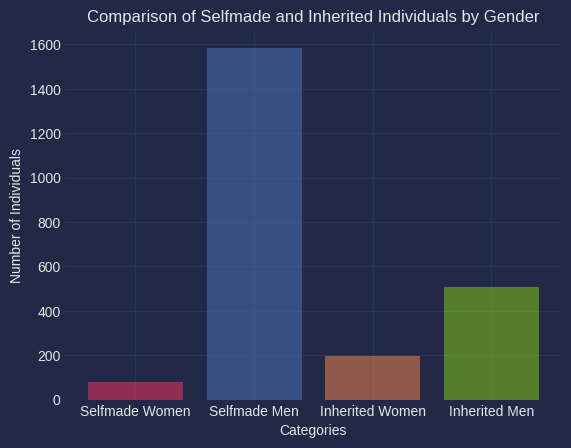

In [ ]:
# Set the cyberpunk style
style.use('cyberpunk')

# Data
categories = ['Selfmade Women', 'Selfmade Men', 'Inherited Women', 'Inherited Men']
counts = [n_sm_w, n_sm_m, n_in_w, n_in_m]

# Create a bar graph
plt.bar(categories, counts, color=[rgb.tue_red, rgb.tue_blue, rgb.tue_orange, rgb.tue_green], alpha=0.5)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Billionaires')
plt.title('Comparison of Selfmade and Inherited Individuals by Gender')

# Show the graph
plt.show()

In [ ]:
# selfmade-inherited woman
NBOOT = 10000 # number of bootstrap replicates to build
N = 100 # np.min([n_f, n_m]) # let's fix the size of each group to be equal, to avoid problems with the varying number of billionaires

Simulation_sm_women = np.random.choice(sm_w["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples
Simulation_in_women = np.random.choice(in_w["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples

Richest_sm_women = np.max(Simulation_sm_women, axis = 1) # the wealthiest for each bootstrap sample
Richest_in_women = np.max(Simulation_in_women, axis = 1) # the wealthiest for each bootstrap sample

# compute the difference in wealth between the two groups
Diff = Richest_sm_women - Richest_in_women

Mean_sm_women = np.mean(Simulation_sm_women, axis = 1)
Mean_in_women = np.mean(Simulation_in_women, axis=1)

Std_sm_women = np.std(Simulation_sm_women, axis = 1)
Std_in_women = np.std(Simulation_in_women, axis = 1)

In [ ]:
# selfmade-inherited man
NBOOT = 10000 # number of bootstrap replicates to build
N = 100 # np.min([n_f, n_m]) # let's fix the size of each group to be equal, to avoid problems with the varying number of billionaires

Simulation_sm_men = np.random.choice(sm_m["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples
Simulation_in_men = np.random.choice(in_m["finalWorth"], size = (NBOOT, N), replace = True) # Nboot x N matrix of bootstrap samples

Richest_sm_men = np.max(Simulation_sm_men, axis = 1) # the wealthiest for each bootstrap sample
Richest_in_men = np.max(Simulation_in_men, axis = 1) # the wealthiest for each bootstrap sample

# compute the difference in wealth between the two groups
Diff = Richest_sm_men - Richest_in_men

Mean_sm_men = np.mean(Simulation_sm_men, axis = 1)
Mean_in_men = np.mean(Simulation_in_men, axis=1)

Std_sm_men = np.std(Simulation_sm_men, axis = 1)
Std_in_men = np.std(Simulation_in_men, axis = 1)

(10000,)

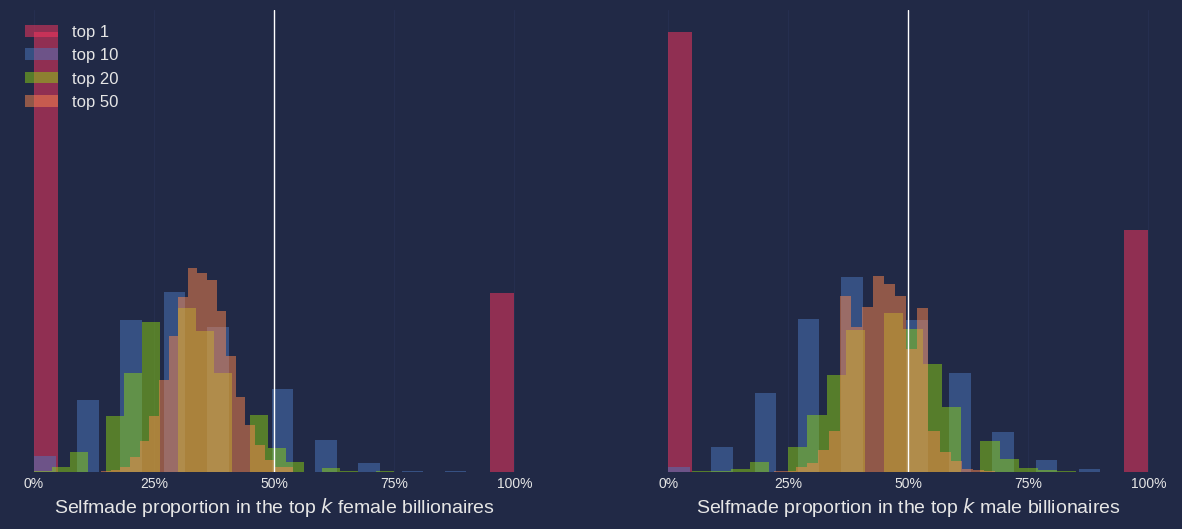

In [ ]:
# Concatenate the simulations and keep track of the females
Simulation_all_women = np.concatenate((Simulation_sm_women, Simulation_in_women), axis=1)
women = np.array([0] * Simulation_sm_women.shape[1] + [1] * Simulation_in_women.shape[1])
# Concatenate the simulations and keep track of the males
Simulation_all_men = np.concatenate((Simulation_sm_men, Simulation_in_men), axis=1)
men = np.array([0] * Simulation_sm_men.shape[1] + [1] * Simulation_in_men.shape[1])

# Get the indices that would sort the array
sorted_indices_gender = np.argsort(Simulation_all_women, axis=1)
sorted_indices_sm = np.argsort(Simulation_all_men, axis=1)

plt.style.use("cyberpunk")

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
ax = axs[0]


for k, c in zip(
    [1, 10, 20, 50], [rgb.tue_red, rgb.tue_blue, rgb.tue_green, rgb.tue_orange]
):
    # Check if the indices of the girls are in the top k
    top_k_girls = np.isin(
        sorted_indices_gender[:, :k],
        np.arange(Simulation_sm_women.shape[1], Simulation_all_women.shape[1]),
    )

    # Compute the percentage of the top k runners that are girls
    percentage_girls = top_k_girls.mean(axis=1) * 100

    ax.hist(
        percentage_girls,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.legend(loc="upper left", framealpha=1.0, facecolor="white", edgecolor="none", fontsize = "large")
ax.set_xlabel("Selfmade proportion in the top $k$ female billionaires", fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.axvline(50, color = "white", alpha = 1.0, lw=1)

ax = axs[1]

for k, c in zip(
    [1, 10, 20, 50], [rgb.tue_red, rgb.tue_blue, rgb.tue_green, rgb.tue_orange]
):
    # Check if the indices of the girls are in the top k
    top_k_selfmade = np.isin(
        sorted_indices_sm[:, :k],
        np.arange(Simulation_sm_men.shape[1], Simulation_all_men.shape[1]),
    )

    # Compute the percentage of the top k runners that are girls
    percentage_selfmade = top_k_selfmade.mean(axis=1) * 100

    ax.hist(
        percentage_selfmade,
        bins=20,
        density=True,
        color=c,
        alpha=0.5,
        label=f"top {k}",
    )

ax.set_xlabel("Selfmade proportion in the top $k$ male billionaires", fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_visible(False)
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.axvline(50, color = "white", alpha = 1.0, lw=1)

#fig.savefig("erbelauf_U10_bootstrap2.pdf")

(-0.25, 1.75)

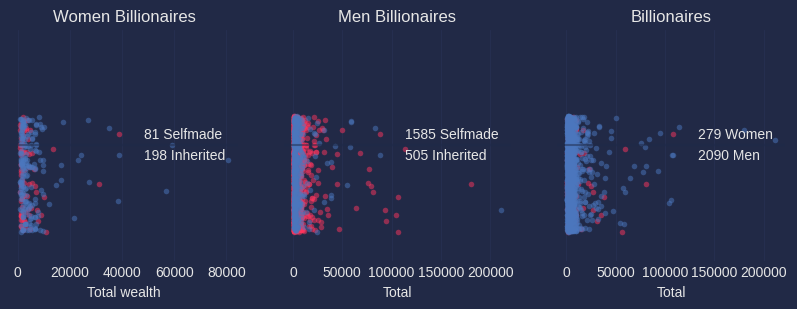

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

ax = axs[0]
ax.set_title("Women Billionaires")
ax.set_xlabel("Total wealth")

np.random.seed(1)
u_sm = np.random.rand(n_sm_w)
u_in = np.random.rand(n_in_w)

ax.plot(
    sm_w["finalWorth"],  u_sm, "o", label=f"{n_sm_w} Selfmade", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 4
)
ax.plot(
    in_w["finalWorth"], u_in, "o", label=f"{n_in_w} Inherited", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 4
)

# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{float(0.00000001)}"))  # Adjust this line
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)

ax = axs[1]

ax.set_title("Men Billionaires")
ax.set_xlabel("Total")

np.random.seed(1)
u_sm = np.random.rand(n_sm_m)
u_in = np.random.rand(n_in_m)

ax.plot(
    sm_m["finalWorth"],  u_sm, "o", label=f"{n_sm_m} Selfmade", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 4
)
ax.plot(
    in_m["finalWorth"], u_in, "o", label=f"{n_in_m} Inherited", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 4
)

# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{float(0.00000001)}"))  # Adjust this line
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)

ax = axs[2]


ax.set_title("Billionaires")
ax.set_xlabel("Total")

np.random.seed(1)
u_f = np.random.rand(n_f)
u_m = np.random.rand(n_m)

ax.plot(
    df_f["finalWorth"],  u_f, "o", label=f"{n_f} Women", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 4
)
ax.plot(
    df_m["finalWorth"], u_m, "o", label=f"{n_m} Men", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 4
)

# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{float(0.00000001)}"))  # Adjust this line
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)

(-0.25, 1.75)

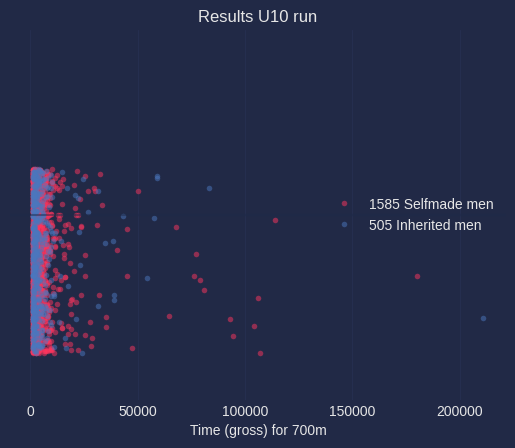

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Results U10 run")
ax.set_xlabel("Time (gross) for 700m")

np.random.seed(1)
u_sm = np.random.rand(n_sm_m)
u_in = np.random.rand(n_in_m)

ax.plot(
    sm_m["finalWorth"],  u_sm, "o", label=f"{n_sm_m} Selfmade men", color=rgb.tue_red, alpha=0.5, mec = "none", ms = 4
)
ax.plot(
    in_m["finalWorth"], u_in, "o", label=f"{n_in_m} Inherited men", color=rgb.tue_blue, alpha=0.5, mec = "none", ms = 4
)

# set the x-axis formatter to the custom function
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{float(0.00000001)}"))  # Adjust this line
ax.legend(loc = 'center right', framealpha = 1.0, facecolor = 'white', edgecolor = 'none')
ax.grid(axis = 'x', which = 'major', alpha = 0.5)
ax.yaxis.set_visible(False)
ax.axhline(0.75, color = rgb.tue_dark, alpha = 0.5)
ax.set_ylim(-0.25, 1.75)


1. While 75% of male millionaires are self-made, the corresponding figure for female millionaires is only 29%. This indicates a significant gender disparity, with a higher proportion of male millionaires achieving their wealth through their own efforts.

2. Despite a substantial percentage of self-made male millionaires, the distribution of inherited wealth among the top male millionaires shows a non-negligible presence in the extreme upper percentiles. When performing bootstrap analysis, the distribution of the top k millionaires converges to around 40%, forming a relatively normal distribution. This suggests that even though a majority are self-made, there exists a notable fraction of extremely wealthy men who inherit their wealth.

3. In contrast, the distribution of self-made wealth among female millionaires is concentrated towards the lower end. The top female millionaires predominantly inherit their wealth, resulting in a significantly lower self-made percentage compared to their male counterparts. This pattern leads to a clustering of the distribution in the left half of the graph, highlighting the pronounced difference in wealth origins between the top male and female millionaires.

2. Is there a difference between gender and being self-made or inherited among billionaires?
In the report, I would explain a little bit more about the bootstrapping process. I was also surprised to see that 50% of billionaires are women in our society. Have you thought about also considering how many, e.g., among self-made are women? Or indeed comparing the two queries?

# 4.Factor Analysis

In [ ]:
# Drop any columns that are not numeric
data = df.select_dtypes(include='number')

# Specify the number of factors you want to extract
num_factors = 4

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

NameError: name 'FactorAnalyzer' is not defined

In [ ]:
# Specify the number of factors you want to extract
num_factors = 4

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(df_encoded.select_dtypes(include='number'))

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='oblimin')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Specify the number of factors you want to extract
num_factors = 3  # Adjust

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='oblimin')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Specify the number of factors you want to extract
num_factors = 2  # Adjust

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='oblimin')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Specify the number of factors you want to extract
num_factors = 5  # Adjust

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='oblimin')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
# Specify the number of factors you want to extract
num_factors = 6  # Adjust

# Initialize the FactorAnalyzer with the specified number of factors
efa = FactorAnalyzer(n_factors=num_factors, rotation=None)

# Fit the FactorAnalyzer to your data
efa.fit(data)

# Obtain the factor loadings
factor_loadings = efa.loadings_

# Print or explore the factor loadings
print("Factor Loadings:")
print(factor_loadings)

In [ ]:
df.columns

# 5.Hypothesis Testing


- The population size of a billionaire's country may have an impact on their net worth. Larger populations might provide a larger market for businesses, potentially leading to higher wealth.
- Economic indicators such as Gross Domestic Product (GDP), Consumer Price Index (CPI), and education enrollment rates in a billionaire's country may influence their net worth.

# 6.Streamlit


In [ ]:
!pip install streamlit pandas

In [ ]:
import streamlit as st

# Create a Streamlit app
st.title("Billionaires Information App")

# Create a dropdown bar to choose a billionaire's name
selected_person = st.selectbox("Select a Billionaire:", df['personName'].unique())

# Filter the dataset based on the selected person
selected_billionaire = df[df['personName'] == selected_person].iloc[0]

# Display information about the selected billionaire
st.subheader("Billionaire Information:")
st.write(f"**Name:** {selected_billionaire['personName']}")
st.write(f"**Age:** {selected_billionaire['age']}")
st.write(f"**Country:** {selected_billionaire['country']}")
st.write(f"**City:** {selected_billionaire['city']}")
st.write(f"**Source of Wealth:** {selected_billionaire['source']}")
st.write(f"**Industries:** {selected_billionaire['industries']}")
st.write(f"**Net Worth:** {selected_billionaire['finalWorth']}")

In [ ]:
!streamlit run billionaires_app.py